In [1]:
matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

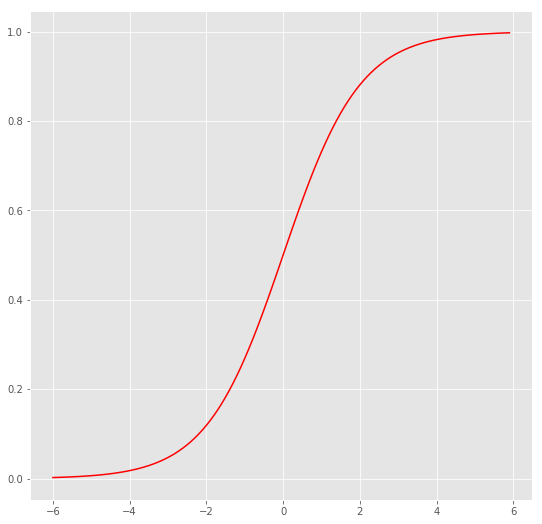

In [3]:
plt.figure(figsize=(9,9))

def sigmoid(t):         # Define the sigmoid function
    return (1/(1 + np.e**(-t)))    

plot_range = np.arange(-6, 6, 0.1)       

y_values = sigmoid(plot_range)

# Plot curve
plt.plot(plot_range,   # X-axis range
         y_values,     # Predicted values
         color="red")

In [4]:
titanic_train = pd.read_csv("train_data.csv")    # Read the data

char_cabin = titanic_train["Cabin"].astype(str)     # Convert cabin to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

titanic_train["Cabin"] = pd.Categorical(new_Cabin)  # Save the new cabin var

# Impute median Age for NA Age values
new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_train["Age"])     # Value if check is false

titanic_train["Age"] = new_age_var 

In [5]:
from sklearn import linear_model
from sklearn import preprocessing

In [6]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(titanic_train["Sex"])

# Initialize logistic regression model
log_model = linear_model.LogisticRegression()

# Train the model
log_model.fit(X = pd.DataFrame(encoded_sex), 
              y = titanic_train["Survived"])

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

[1.00027876]
[[-2.43010712]]


S:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
# Make predictions
preds = log_model.predict_proba(X= pd.DataFrame(encoded_sex))
preds = pd.DataFrame(preds)
preds.columns = ["Death_prob", "Survival_prob"]

# Generate table of predictions vs Sex
pd.crosstab(titanic_train["Sex"], preds.loc[:, "Survival_prob"])

Survival_prob,0.19312542897248655,0.7311133823315542
Sex,,
female,0,314
male,577,0


In [8]:
# Convert more variables to numeric
encoded_class = label_encoder.fit_transform(titanic_train["Pclass"])
encoded_cabin = label_encoder.fit_transform(titanic_train["Cabin"])

train_features = pd.DataFrame([encoded_class,
                              encoded_cabin,
                              encoded_sex,
                              titanic_train["Age"]]).T

# Initialize logistic regression model
log_model = linear_model.LogisticRegression()

# Train the model
log_model.fit(X = train_features ,
              y = titanic_train["Survived"])

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

[3.32716302]
[[-0.90790164 -0.06426483 -2.43179802 -0.0265924 ]]


S:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
# Make predictions
preds = log_model.predict(X= train_features)

# Generate table of predictions vs actual
pd.crosstab(preds,titanic_train["Survived"])

Survived,0,1
row_0,,
0,463,98
1,86,244


In [10]:
(463+244)/891

0.7934904601571269

In [11]:
log_model.score(X = train_features ,
                y = titanic_train["Survived"])

0.7934904601571269

In [12]:
from sklearn import metrics

In [13]:
# View confusion matrix
metrics.confusion_matrix(y_true=titanic_train["Survived"],  # True labels
                         y_pred=preds) # Predicted labels

array([[463,  86],
       [ 98, 244]], dtype=int64)

In [14]:
# View summary of common classification metrics
print(metrics.classification_report(y_true=titanic_train["Survived"],
                              y_pred=preds) )

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       549
           1       0.74      0.71      0.73       342

   micro avg       0.79      0.79      0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



In [15]:
# Read and prepare test data
titanic_test = pd.read_csv("test_data.csv")    # Read the data

char_cabin = titanic_test["Cabin"].astype(str)     # Convert cabin to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

titanic_test["Cabin"] = pd.Categorical(new_Cabin)  # Save the new cabin var

# Impute median Age for NA Age values
new_age_var = np.where(titanic_test["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_test["Age"])      # Value if check is false

titanic_test["Age"] = new_age_var 

In [16]:
# Convert test variables to match model features
encoded_sex = label_encoder.fit_transform(titanic_test["Sex"])
encoded_class = label_encoder.fit_transform(titanic_test["Pclass"])
encoded_cabin = label_encoder.fit_transform(titanic_test["Cabin"])

test_features = pd.DataFrame([encoded_class,
                              encoded_cabin,
                              encoded_sex,
                              titanic_test["Age"]]).T

In [17]:
# Make test set predictions
test_preds = log_model.predict(X=test_features)

# Create a submission for Kaggle
submission = pd.DataFrame({"PassengerId":titanic_test["PassengerId"],
                           "Survived":test_preds})

# Save submission to CSV
submission.to_csv("tutorial_logreg_submission.csv", 
                  index=False)        # Do not save index values

# Questions

### 1. Describe what the sigmoid function defined in Cell number 3 in the tutorial does.

In [18]:
# Return a probability value which can then be mapped to two or more discrete classes

### 2. When does a sigmoid function output a probability greater than 0.5?

In [19]:
# When the variables considered produce a positive outcome

### 3. Age is a feature in the titanic data. It has some missing values:

a. Explain how the missing values are handled in the tutorial

In [20]:
# The null values are replaced by the median

b. Use a numpy function to imputing the missing values in age, to obtain the same results as in the tutorial

In [21]:
# titanic_train["Age"].fillna(titanic_train["Age"].median(), inplace=True)

### 4. Do sklearn’s machine learning functions allow for the features to be categorical?

In [22]:
# No, as they have to be converted to numerical values

### 5. In the tutorial, Label Encoding is used:

a. Explain the importance of label encoding

In [23]:
# It converts the categorical values into numerical values. 

b. Describe how it has been implemented in the tutorial

In [24]:
# The categorical values in the Sex column i.e. Male and female are converted to 1's and 0's for use in the model

c. Describe other ways in which encoding could have been done

In [25]:
# Convert the data type of the column for example sex as below
# titanic_train['Sex'] = titanic_train['Sex'].astype('category')

# Use the .cat.codes function to automatically assign unique numerical values to each unique category
# titanic_train['Sex'] = titanic_train['Sex'].cat.codes

### 6. What is the logistic regression model learned?

In [26]:
# y = (-2.43010712 * x) + 1.00027876

### 7. Discuss the difference between the methods predict and predict_proba of a logistic regression model

In [27]:
# predict gives the classes being predicted by the model 
# while predict_proba shows the probability of geting a certain class

### 8. In regards to metrics:

a. What is a confusion matrix?

In [28]:
# A table that gives a measure of the performance of a model on test data whose true values are known

b. Discuss the confusion matrix of the model learned

In [29]:
# We can tell that there are two possible predicted classes 0 (died) and 1 (survived)

#----------------------------------------------------------------------------------------

#      0     1
# 0   463    98
# 1   86    244


# Using the layout above
# Total Predictions = 463 + 98 + 86 + 244 = 891

# Predicted values
# Survived = 98 + 244 = 342
# Died = 463 + 86 = 549

# Actual Values
# Survived = 86 + 244 = 330
# Died = 463 + 98 = 561

#----------------------------------------------------------------------------------------

#               Predicted 0      Predicted 1
#  Actual 0        TN                FP
#  Actual 1        FN                TP

# Using Died = 0 and Survived = 1 and layout above

# TRUE NEGATIVE (TN): Predicted 1, Actual 1 = 463
# TRUE POSITIVES (TP): Predicted 1, Actual 1 = 244

# FALSE POSITIVES (FP): Predicted 1, Actual 0 = 98
# FALSE NEGATIVE (FN); Predicted 0, Actual 1 = 86

#----------------------------------------------------------------------------------------

# Accuracy (TP + TN / Total)-> 244 + 463 / 891 = 0.79349046015
#  This describes how often the model or classifier is right

# Precision (TP / Predicted 1)-> 244 / 342 = 0.71345029239
#  This describes how often the model or classifier is right when it predicts the class 1

# Recall (TP / Actual 1): 244 / 330 = 0.73939393939
#  This describes how often does it predicts 1 when it's actually 1

# Prevalence (Actual 1 / Total): 330 / 891 = 0.37037037037
#  This describes how often does the class 1 actually occurs